In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Generating synthetic data
np.random.seed(42)

def generate_data(n_samples):
    hours = np.random.randint(0, 24, n_samples)
    load = np.random.uniform(1.0, 10.0, n_samples)  # current power usage (kW)
    solar_produced = np.random.uniform(0.0, 15.0, n_samples)  # solar energy produced (kW)
    future_solar = np.random.uniform(0.0, 15.0, n_samples)  # future solar production
    grid_rate = np.where(hours < 12, np.random.uniform(0.1, 0.2, n_samples), np.random.uniform(0.3, 0.5, n_samples))  # variable rate
    commission_threshold = np.random.uniform(2.0, 5.0, n_samples)  # reserve to sell at 6 PM
    solar_to_store = solar_produced - commission_threshold  # solar available for storage/sale

    # Classification target: 1 if solar should be used, 0 if grid should be used
    y = (solar_produced > load) & (solar_to_store > 0) & (grid_rate > 0.25)  # simple logic for target

    data = {
        'hour': hours,
        'load': load,
        'solar_produced': solar_produced,
        'future_solar': future_solar,
        'grid_rate': grid_rate,
        'solar_to_store': solar_to_store,
        'use_solar': y.astype(int)  # 1 for using solar, 0 for grid
    }

    return pd.DataFrame(data)

# Generate 1000 samples of data
df = generate_data(50000)
print(df.head())

# Splitting data
X = df[['hour', 'load', 'solar_produced', 'future_solar', 'grid_rate', 'solar_to_store']]
y = df['use_solar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   hour      load  solar_produced  future_solar  grid_rate  solar_to_store  \
0     6  4.941079        3.166499      9.663810   0.159827       -1.372634   
1    19  6.125367        5.092573     11.575998   0.461404        0.785335   
2    14  1.338280        5.695518     12.330411   0.360405        2.090783   
3    10  2.449335       10.311304      2.255253   0.136653        5.351262   
4     7  3.323180        9.387572      9.770582   0.163572        6.036454   

   use_solar  
0          0  
1          0  
2          1  
3          0  
4          0  


In [ ]:
df

,hour,load,solar_produced,future_solar,grid_rate,solar_to_store,use_solar
0,6,4.941079,3.166499,9.663810,0.159827,-1.372634,0
1,19,6.125367,5.092573,11.575998,0.461404,0.785335,0
2,14,1.338280,5.695518,12.330411,0.360405,2.090783,1
3,10,2.449335,10.311304,2.255253,0.136653,5.351262,0
4,7,3.323180,9.387572,9.770582,0.163572,6.036454,0
...,...,...,...,...,...,...,...
49995,18,5.713686,3.955836,6.378627,0.382547,-0.791853,0
49996,22,6.733873,14.295387,12.383573,0.395685,9.469862,1
49997,14,7.021452,13.561583,13.592609,0.428879,8.610484,1
49998,7,7.891731,10.526660,4.711968,0.129391,6.271779,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and evaluating
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.998
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6942
           1       1.00      1.00      1.00      3058

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
def update_solar_strategy(df):
    df['reserved_for_station'] = df.apply(lambda row: 1 if (row['hour'] == 18 and row['solar_to_store'] > 5.0) else 0, axis=1)
    return df

df = update_solar_strategy(df)


In [ ]:
pip install numpy pandas scikit-learn matplotlib


Cross-validation scores: [0.99       0.99285714 0.99214286 0.99428571 0.99285714]
Mean cross-validation accuracy: 0.9924285714285714
Test Accuracy: 0.9936666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2115
           1       0.98      0.99      0.99       885

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



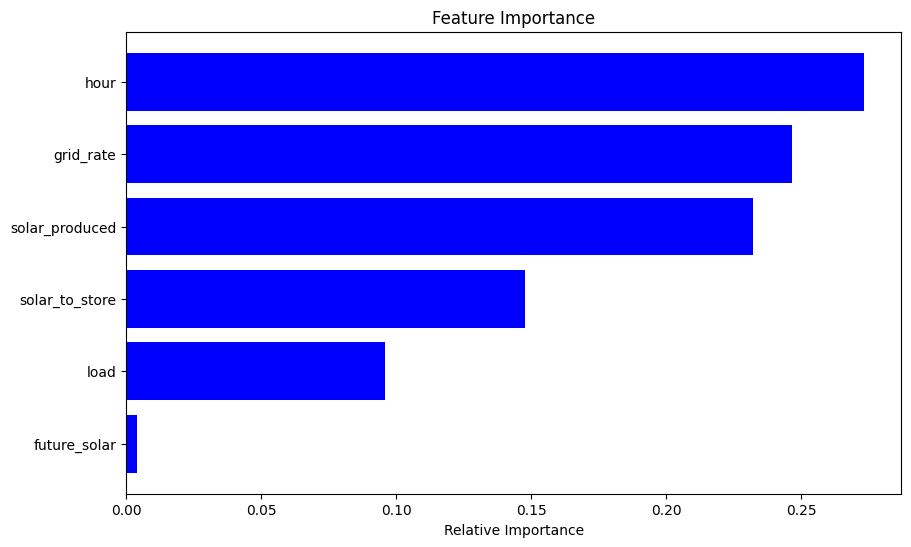

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Function to generate synthetic data with randomness and noise
def generate_complex_data(n_samples):
    hours = np.random.randint(0, 24, n_samples)
    load = np.random.uniform(1.0, 10.0, n_samples)  # Random load
    solar_produced = np.random.uniform(0.0, 15.0, n_samples)  # Solar energy
    future_solar = np.random.uniform(0.0, 15.0, n_samples)  # Future solar forecast
    grid_rate = np.where(hours < 12, np.random.uniform(0.1, 0.2, n_samples), np.random.uniform(0.3, 0.5, n_samples))  # Variable grid rates
    # Introducing random noise to load and production values
    load += np.random.normal(0, 1, n_samples)  # Adding noise to simulate random spikes
    solar_produced += np.random.normal(0, 1, n_samples)  # Adding noise to solar production
    commission_threshold = np.random.uniform(2.0, 5.0, n_samples)  # Threshold for solar to save
    solar_to_store = solar_produced - commission_threshold  # Solar energy that can be stored

    # Classification target based on more complex interaction
    y = (solar_produced > load) & (solar_to_store > 0) & (grid_rate > 0.25)  # Logic for classification

    data = {
        'hour': hours,
        'load': load,
        'solar_produced': solar_produced,
        'future_solar': future_solar,
        'grid_rate': grid_rate,
        'solar_to_store': solar_to_store,
        'use_solar': y.astype(int)
    }

    return pd.DataFrame(data)

# 2. Function to train and evaluate Random Forest model
def train_random_forest_model(data):
    # Define feature columns and target
    X = data[['hour', 'load', 'solar_produced', 'future_solar', 'grid_rate', 'solar_to_store']]
    y = data['use_solar']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize Random Forest with limited depth and other parameters
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Cross-validation
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
    print("Cross-validation scores:", scores)
    print("Mean cross-validation accuracy:", scores.mean())

    # Test the model on the test data
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return rf_model, X_test, y_test, y_pred

# 3. Function to plot feature importance
def plot_feature_importance(model, X):
    importances = model.feature_importances_
    features = X.columns
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

# Main function to run the entire process
if __name__ == '__main__':
    # Generate the data
    data = generate_complex_data(10000)

    # Train and evaluate the Random Forest model
    rf_model, X_test, y_test, y_pred = train_random_forest_model(data)

    # Plot feature importance
    plot_feature_importance(rf_model, data[['hour', 'load', 'solar_produced', 'future_solar', 'grid_rate', 'solar_to_store']])


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# 1. Function to generate synthetic data with randomness and noise
def generate_complex_data(n_samples):
    hours = np.random.randint(0, 24, n_samples)
    load = np.random.uniform(1.0, 10.0, n_samples)
    solar_produced = np.random.uniform(0.0, 15.0, n_samples)
    future_solar = np.random.uniform(0.0, 15.0, n_samples)
    grid_rate = np.where(hours < 12, np.random.uniform(0.1, 0.2, n_samples), np.random.uniform(0.3, 0.5, n_samples))
    load += np.random.normal(0, 1, n_samples)
    solar_produced += np.random.normal(0, 1, n_samples)
    commission_threshold = np.random.uniform(2.0, 5.0, n_samples)
    solar_to_store = solar_produced - commission_threshold

    y = (solar_produced > load) & (solar_to_store > 0) & (grid_rate > 0.25)

    data = {
        'hour': hours,
        'load': load,
        'solar_produced': solar_produced,
        'future_solar': future_solar,
        'grid_rate': grid_rate,
        'solar_to_store': solar_to_store,
        'use_solar': y.astype(int)
    }

    return pd.DataFrame(data)

# 2. Train and save model
def train_and_save_model():
    # Generate data
    data = generate_complex_data(10000)

    # Prepare features and target
    X = data[['hour', 'load', 'solar_produced', 'future_solar', 'grid_rate', 'solar_to_store']]
    y = data['use_solar']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluate model
    y_pred = rf_model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Save the trained model using joblib
    joblib.dump(rf_model, 'random_forest_model.pkl')
    print("Model saved as random_forest_model.pkl")

if __name__ == '__main__':
    train_and_save_model()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2042
           1       0.99      0.99      0.99       958

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       1.00      0.99      1.00      3000

Model saved as random_forest_model.pkl


In [ ]:
!pip install --ignore-installed blinker

In [ ]:
!pip install flask

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
!pip install requests

In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok

# Replace 'YOUR_AUTHTOKEN' with your actual ngrok authtoken
ngrok.set_auth_token("2nur7cF41HM87CaLm7W7EUyuB2L_3Wbi7LR2VpSoQM4TzXJpd")

In [ ]:
from pyngrok import ngrok

# Expose the Flask app
public_url = ngrok.connect(5000)  # Change 5000 if your Flask app runs on a different port
print(f"Flask app is running at: {public_url}")


Flask app is running at: NgrokTunnel: "https://8c63-34-133-61-63.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np
import os
import requests
from pyngrok import ngrok

app = Flask(__name__)

# Load the saved model
model = joblib.load('random_forest_model.pkl')

# Define API endpoint for predictions
@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    hour = data['hour']
    load = data['load']
    solar_produced = data['solar_produced']
    future_solar = data['future_solar']
    grid_rate = data['grid_rate']
    solar_to_store = data['solar_to_store']

    input_data = np.array([[hour, load, solar_produced, future_solar, grid_rate, solar_to_store]])
    prediction = model.predict(input_data)[0]

    # Prepare the payload for the second API
    energy_value = load  # Use 'load' or any other value as required
    time_value = hour    # Use 'hour' or any other time indicator as required

    payload = {
        "energy": str(energy_value),  # Convert to string
        "source": "solar" if prediction == 1 else "grid",  # Example source based on prediction
        "time": str(time_value)        # Convert to string
    }

    # Send the POST request to the specified URL
    response = requests.post('https://urja-3wj9.onrender.com/api/energy/671b2e80ece35bb263336978', json=payload)

    # Handle the response from the external API
    if response.status_code == 200:
        response_data = response.json()
        return jsonify({'success': True, 'data': response_data})
    else:
        return jsonify({'success': False, 'error': response.text}), response.status_code

if __name__ == '__main__':
    # Start ngrok tunnel
    public_url = ngrok.connect(5000)
    print(f"Flask app is running at: {public_url}")

    # Run Flask app
    app.run(host='0.0.0.0', port=5000)


Flask app is running at: NgrokTunnel: "https://54dd-34-133-61-63.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [25/Oct/2024 19:23:35] "POST /predict HTTP/1.1" 201 -
